<h2 align="center"> The University of Adelaide, School of Computer Science </h2>
<h1 align="center"><strong><b> Applied Natural Language Processing </b></strong></h1>
<h2 align="center"> Semester 1, 2023 Assignment 2: Building a text matching system for question matching </h2>
<h2 align="center"> Author: Akide Liu </h2>
<h3 align="center"> Student ID: a1743748 </h3>


## 0. Import libraries and set up the environment

In [35]:
import time

# import libs
from utils import *

# Matplotlib is a useful plotting library for python
import matplotlib.pyplot as plt
# This code is to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Write code for data loading and text preprocessing 5%

## 1.1 Load the data

In [36]:
# Read the CSV file
df = pd.read_csv('data.tsv', sep="\t",error_bad_lines=False)

# print the first 5 rows
df.head()

/tmp/ipykernel_1339937/7530907.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('data.tsv', sep="\t",error_bad_lines=False)
Skipping line 83032: expected 6 fields, saw 7

Skipping line 154657: expected 6 fields, saw 7

Skipping line 323916: expected 6 fields, saw 7

/tmp/ipykernel_1339937/7530907.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.tsv', sep="\t",error_bad_lines=False)


,id,qid1,qid2,question1,question2,is_duplicate
0,133273,213221,213222.0,How is the life of a math student? Could you d...,Which level of prepration is enough for the ex...,0.0
1,402555,536040,536041.0,How do I control my horny emotions?,How do you control your horniness?,1.0
2,360472,364011,490273.0,What causes stool color to change to yellow?,What can cause stool to come out as little balls?,0.0
3,150662,155721,7256.0,What can one do after MBBS?,What do i do after my MBBS ?,1.0
4,183004,279958,279959.0,Where can I find a power outlet for my laptop ...,"Would a second airport in Sydney, Australia be...",0.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363192 entries, 0 to 363191
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            363192 non-null  object 
 1   qid1          363192 non-null  object 
 2   qid2          363185 non-null  float64
 3   question1     363181 non-null  object 
 4   question2     363180 non-null  object 
 5   is_duplicate  363180 non-null  float64
dtypes: float64(2), object(4)
memory usage: 16.6+ MB


In [38]:
# remove errors in the df, if the type of question are not string, then remove it
df = df[df['question1'].apply(lambda x: type(x) == str)]
df = df[df['question2'].apply(lambda x: type(x) == str)]

## 1.2 Preprocess the data

In [39]:
import string
import re
def preprocess(text):

    if type(text) != str:
        return ""
    if '\t' in text:
        return ""
    # Lowercase the text
    text = text.lower()

    text = text.split()

    text = [w for w in text if not w in nltk.corpus.stopwords.words('english')]

    text = ' '.join(text)

    # Tokenize the text by replacing punctuation with spaces
    translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    text = text.translate(translator)

    # Replace all whitespace with a single space
    text = re.sub('\s+', ' ', text)

    # Strip leading and trailing whitespace
    text = text.strip()

    return text

preprocess(df['question1'].iloc[0])

'life math student could describe experiences'

In [40]:
df["question1_preprocessed"] = track_parallel_progress(preprocess, df['question1'].to_list(), nproc=10)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

  0%|          | 0/363179 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [41]:
df["question2_preprocessed"] = track_parallel_progress(preprocess, df['question2'].to_list(), nproc=10)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

  0%|          | 0/363179 [00:00<?, ?it/s]

## 1.3 collect the query set and candidate set

collect the query set, Specifically, we will use the first 100 questions with is_duplicate = 1 to form 100 queries.

In [42]:
# collect the query set
df_backup = df.copy()
query_set = df[df['is_duplicate'] == 1]['question1_preprocessed'].head(100).tolist()

query_id = []
for q in query_set:
    query_id.append(df[df['question1_preprocessed'] == q].index.tolist()[0])

query_set[0]

'control horny emotions'

In [43]:
# remove columns level duplicates for question2

print(df.shape)
candidate_set = df.drop_duplicates(subset=['question2_preprocessed'])
candidate_set = candidate_set[candidate_set['question2_preprocessed'] != '']
candidate_set = candidate_set['question2_preprocessed'].tolist()[0:10000]
print(len(candidate_set))
print(candidate_set[1])

(363179, 8)
10000
control horniness


## 2. Write code for building inverted index with TF-IDF and performing text matching 25%

## 2.1 Build the inverted index with TF-IDF By Pure Python

In [10]:
from collections import defaultdict
import math

class TFIDF:
    def __init__(self):
        self.documents = None
        self.inverted_index = defaultdict(dict)
        self.document_frequencies = defaultdict(int)

    def build_index(self, documents):
        self.documents = documents
        for doc_id, doc in tqdm(enumerate(documents), desc="Building index"):
            terms = doc.lower().split()
            term_count = len(terms)
            term_frequency = defaultdict(int)
            for term in terms:
                term_frequency[term] += 1
            for term, frequency in term_frequency.items():
                self.inverted_index[term][doc_id] = frequency / term_count  # calculate relative frequency
            for term in set(terms):
                self.document_frequencies[term] += 1

        num_documents = len(self.documents)
        for term in self.inverted_index:
            df = self.document_frequencies[term]
            idf = math.log(num_documents / df)
            for doc_id, tf in self.inverted_index[term].items():
                tf_idf = tf * idf
                self.inverted_index[term][doc_id] = tf_idf

    def search(self, query, top_k=1):
        query_terms = query.lower().split()
        scores = defaultdict(float)
        for term in query_terms:
            if term in self.inverted_index:
                for doc_id, tf_idf in self.inverted_index[term].items():
                    scores[doc_id] += tf_idf

        sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
        results = []
        for doc_id, score in sorted_scores:
            results.append((self.documents[doc_id], score, doc_id))
        return results[0:top_k]


In [45]:
def evaluate(target_class, q_data, q_gt, train_data, top_k=1, **kwargs):
    matcher = target_class(**kwargs)
    matcher.build_index(train_data)
    correct = 0
    for q, gt in tqdm(zip(q_data, q_gt), desc="Evaluating"):
        results = matcher.search(q, top_k=top_k)
        for result in results:
            if result[2] == gt:
                correct += 1
                break
    print(f"Accuracy: Top-K={top_k}", correct / len(q_data))
    return correct / len(q_data)

In [12]:
tfidf = TFIDF()
tfidf.build_index(candidate_set)
print(query_set[0])
print(candidate_set[query_id[0]])
tfidf.search(query_set[0],top_k=3)

Building index: 0it [00:00, ?it/s]

control horny emotions
control horniness


[('control emotions', 6.5227011681341, 2272),
 ('control emotions anger', 4.348467445422733, 2020),
 ('control emotions reactions nervousness', 3.26135058406705, 4717)]

### Top2 accuracy

In [13]:
evaluate(TFIDF, query_set, query_id, candidate_set, top_k=2)

Building index: 0it [00:00, ?it/s]

Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=2 0.68


0.68

### Top5 accuracy

In [14]:
evaluate(TFIDF, query_set, query_id, candidate_set, top_k=5)

Building index: 0it [00:00, ?it/s]

Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=5 0.84


0.84

## 2.2 Build the inverted index with TF-IDF By Sklearn (verfiy the result)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer


class InvertedIndex:
    def __init__(self):
        self.vectorizer = TfidfVectorizer()

    def build_index(self, documents):
        self.documents = documents
        self.tfidf_matrix = self.vectorizer.fit_transform(self.documents)

    def search(self, query, top_k=1):
        query_vector = self.vectorizer.transform([query])
        scores = self.tfidf_matrix.dot(query_vector.T).toarray().flatten()
        sorted_indices = scores.argsort()[::-1]
        results = [(self.documents[i], scores[i], i) for i in sorted_indices if scores[i] > 0]
        return results[0:top_k]

index = InvertedIndex()
index.build_index(candidate_set)

In [16]:
index.search(query_set[0],top_k=3)

[('control emotions', 1.0, 2272),
 ('control emotions anger', 0.7966226755142278, 2020),
 ('control anger impulsive emotions', 0.647119109904462, 4771)]

In [17]:
evaluate(InvertedIndex, query_set, query_id, candidate_set, top_k=2)

Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=2 0.74


0.74

In [18]:
evaluate(InvertedIndex, query_set, query_id, candidate_set, top_k=5)

Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=5 0.86


0.86

In [19]:
def SearchQuestion(question,top_k=1, need_preprocess=True):
    raw_q = question
    if need_preprocess:
        question = preprocess(question)

    results = tfidf.search(question, top_k)
    print(
        f"Raw question: {raw_q}\n"
        f"Query: {question}\n"
        f"Results: {results}\n"
    )
    return results

In [20]:
_ = SearchQuestion("How is weather today ? ",top_k=3)

Raw question: How is weather today ? 
Query: weather today
Results: [('challenges face today', 1.8664741531106526, 4687), ('people evil today', 1.8664741531106526, 7051), ('eat ice cream weather cold', 1.6223456166616146, 875)]



# 3. Write code for building text matching with sentence embedding. The sentence embedding is calculated by averaging word embedding. 10%

In [44]:
import numpy as np
from numpy.linalg import norm

class GloveTextMatching:
    def __init__(self,dim=300):
        self.document_embeddings = None
        self.documents = None
        self.word_embeddings = self.load_glove_embeddings(f'glove.6B.{dim}d.txt')
        self.dim = self.word_embeddings['hello'].shape[0]

    def build_index(self, documents):
        self.documents = documents
        self.document_embeddings = np.array([self.calculate_sentence_embedding(doc) for doc in self.documents])

    def load_glove_embeddings(self, file_path):
        embeddings = {}
        with open(file_path, 'r', encoding='utf-8') as f:
            for line in f:
                values = line.split()
                word = values[0]
                embedding = np.asarray(values[1:], dtype='float32')
                embeddings[word] = embedding
        return embeddings

    def calculate_sentence_embedding(self, sentence):
        tokens = sentence.split()
        embeddings = [self.word_embeddings.get(token, np.ones((self.dim,))) for token in tokens]
        if len(embeddings) == 0:
            return np.zeros((self.dim,))
        else:
            return np.mean(embeddings, axis=0)

    def search(self, query, top_k=1):
        query = preprocess(query)  # Make sure to define or import preprocess
        query_embedding = self.calculate_sentence_embedding(query)

        document_norms = norm(self.document_embeddings, axis=1)
        query_norm = norm(query_embedding)
        cosine_similarities = np.dot(self.document_embeddings, query_embedding)/(document_norms * query_norm + 1e-8)

        top_k_indices = cosine_similarities.argsort()[-top_k:][::-1]

        results = [(self.documents[i], cosine_similarities[i], i) for i in top_k_indices]
        return results


In [22]:
glove_text_matching = GloveTextMatching()
glove_text_matching.build_index(candidate_set[0:10000])
print(query_set[10])
print(candidate_set[query_id[10]])
glove_text_matching.search(query_set[10],top_k=5)

best books cosmology
best book cosmology


[('best book cosmology', 0.9501094039853716, 27),
 ('best contemporary romance books', 0.7740184942416759, 6732),
 ('best books politics', 0.7708773473371627, 3230),
 ('best books learn astronomy beginners', 0.7677869660639486, 3478),
 ('best books physical chemistry', 0.7633081611650696, 9297)]

In [23]:
glove_text_matching.word_embeddings['hello'].shape

(300,)

In [24]:
candidate_set[10].split()[2]

'lifestyle'

### Top2 accuracy

In [25]:
evaluate(GloveTextMatching, query_set, query_id, candidate_set, top_k=2)

Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=2 0.69


0.69

### Top5 accuracy

In [26]:
evaluate(GloveTextMatching, query_set, query_id, candidate_set, top_k=5)

Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=5 0.77


0.77

# 4. Write code for building text matching with sentence embedding. The sentence embedding is calculated by using an alternative strategy other than averaging word embedding, e.g., downweight frequent words, or using the method in Sanjeev Arora, Yingyu Liang, Tengyu Ma, A SIMPLE BUT TOUGH-TO-BEAT BASELINE FOR SENTENCE EMBEDDINGS, ICLR 2017. 10%

## 4.1 Downweight frequent words

In [27]:
from collections import Counter
import numpy as np

class DownWeightGloveTextMatching(GloveTextMatching):
    def __init__(self, a=0.5, dim=300):
        super().__init__(dim=dim)
        self.a = a
        print(f'Using a = {self.a}')

    def build_index(self, documents):
        word_frequencies = Counter()
        for doc in documents:
            tokens = doc.split()
            word_frequencies.update(tokens)
        self.word_frequencies = word_frequencies
        super().build_index(documents)

    def calculate_sentence_embedding(self, sentence):
        tokens = sentence.split()
        embeddings = []
        weights = []
        for token in tokens:
            if token in self.word_embeddings:
                embeddings.append(self.word_embeddings[token])
                weights.append(np.log(self.a / (self.a + self.word_frequencies[token])))
            else:
                embeddings.append(np.ones((self.dim,)))
                weights.append(1e-8)
        if embeddings:
            embedding = np.average(embeddings, axis=0, weights=weights)
        else:
            embedding = np.zeros((self.dim,))
        return embedding

In [28]:
glove_text_matching = DownWeightGloveTextMatching()
glove_text_matching.build_index(candidate_set)
glove_text_matching.search(query_set[0],top_k=3)

Using a = 0.5


[('control emotions', 0.99999999959915, 2272),
 ('control emotions reactions nervousness', 0.9528656707915971, 4717),
 ('control emotions anger', 0.9371752084382537, 2020)]

### Top2 accuracy

In [29]:
evaluate(DownWeightGloveTextMatching, query_set, query_id, candidate_set, top_k=2)

Using a = 0.5


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=2 0.61


0.61

### Top5 accuracy

In [30]:
evaluate(DownWeightGloveTextMatching, query_set, query_id, candidate_set, top_k=5)

Using a = 0.5


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=5 0.71


0.71

### Eval A values

In [31]:
def evaluate_a_values(method=DownWeightGloveTextMatching, a_list=None):
    if a_list is None:
        a_list = [5e-4,5e-3,0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 1, 2, 3]
    result = []
    for a in a_list:
        top2 = evaluate(method, query_set, query_id, candidate_set, top_k=2, a=a)
        top5 = evaluate(method, query_set, query_id, candidate_set, top_k=5, a=a)
        result.append({
            'a': a,
            'top2': top2,
            'top5': top5
        })
    return result

In [32]:
result = evaluate_a_values()

Using a = 0.0005


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=2 0.7
Using a = 0.0005


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=5 0.79
Using a = 0.005


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=2 0.68
Using a = 0.005


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=5 0.79
Using a = 0.05


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=2 0.67
Using a = 0.05


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=5 0.78
Using a = 0.1


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=2 0.69
Using a = 0.1


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=5 0.77
Using a = 0.3


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=2 0.64
Using a = 0.3


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=5 0.74
Using a = 0.5


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=2 0.61
Using a = 0.5


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=5 0.71
Using a = 0.7


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=2 0.59
Using a = 0.7


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=5 0.7
Using a = 0.9


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=2 0.59
Using a = 0.9


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=5 0.7
Using a = 1


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=2 0.59
Using a = 1


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=5 0.69
Using a = 2


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=2 0.54
Using a = 2


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=5 0.64
Using a = 3


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=2 0.54
Using a = 3


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=5 0.61


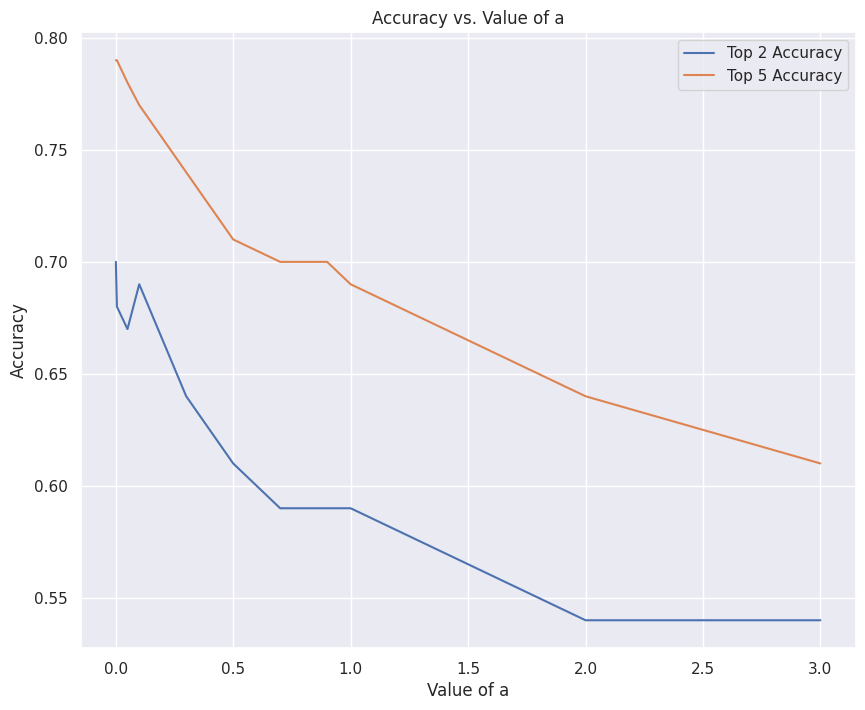

,a,top2,top5
0,0.0005,0.70,0.79
1,0.0050,0.68,0.79
2,0.0500,0.67,0.78
3,0.1000,0.69,0.77
4,0.3000,0.64,0.74
5,0.5000,0.61,0.71
6,0.7000,0.59,0.70
7,0.9000,0.59,0.70
8,1.0000,0.59,0.69
9,2.0000,0.54,0.64


In [33]:
# Create a pandas DataFrame from the result list
df = pd.DataFrame(result)

# Plot the data using seaborn
sns.lineplot(data=df, x='a', y='top2', label='Top 2 Accuracy')
sns.lineplot(data=df, x='a', y='top5', label='Top 5 Accuracy')

# Set plot labels and title
sns.set(style='darkgrid')
plt.xlabel('Value of a')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Value of a')

# Show the plot
plt.show()
df

## 4.2 Sanjeev Arora, Yingyu Liang, Tengyu Ma, A SIMPLE BUT TOUGH-TO-BEAT BASELINE FOR SENTENCE EMBEDDINGS, ICLR 2017

Smooth Inverse Frequency (SIF)

In [34]:
import numpy as np
from numpy.linalg import norm
from collections import Counter
from sklearn.decomposition import PCA, TruncatedSVD
import warnings
warnings.filterwarnings('ignore')

class SIFGloveTextMatching(DownWeightGloveTextMatching):
    def __init__(self, a=1e-5, dim=300):
        super().__init__(a=a, dim=dim)

    def calculate_sentence_embedding(self, sentence):
        tokens = sentence.split()
        embeddings = []
        weights = []
        for word in tokens:
            if word in self.word_embeddings:
                embeddings.append(self.word_embeddings[word])
                # Use the frequency of the word in the entire corpus to calculate the weight
                weights.append(np.log(self.a / (self.a + self.word_frequencies.get(word, 1e-7+1))))

        if len(embeddings) == 1 or np.var(embeddings) == 0:
            return np.average(embeddings, axis=0, weights=weights)

        if not embeddings:
            return np.zeros((self.dim,))

        avg_embedding = np.average(embeddings, axis=0, weights=weights)
        pca = PCA(n_components=1)
        pca.fit(embeddings)
        pc = pca.components_
        embedding = avg_embedding - pc * np.dot(avg_embedding, pc.T)
        embedding = np.squeeze(embedding, axis=0)

        return embedding


In [35]:
glove_text_matching = SIFGloveTextMatching()
glove_text_matching.build_index(candidate_set)
glove_text_matching.search(query_set[0],top_k=3)

Using a = 1e-05


[('control emotions', 0.7619193068476802, 2272),
 ('control anger impulsive emotions', 0.725260713573077, 4771),
 ('control emotions anger', 0.7043610475217545, 2020)]

### eval SIFGloveTextMatching top 2

In [36]:
evaluate(SIFGloveTextMatching, query_set, query_id, candidate_set, top_k=2)

Using a = 1e-05


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=2 0.68


0.68

### eval SIFGloveTextMatching top 5

In [37]:
evaluate(SIFGloveTextMatching, query_set, query_id, candidate_set, top_k=5)

Using a = 1e-05


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=5 0.79


0.79

### Eval A values

In [38]:
result = evaluate_a_values(SIFGloveTextMatching)

Using a = 0.0005


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=2 0.68
Using a = 0.0005


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=5 0.79
Using a = 0.005


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=2 0.67
Using a = 0.005


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=5 0.78
Using a = 0.05


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=2 0.66
Using a = 0.05


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=5 0.78
Using a = 0.1


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=2 0.66
Using a = 0.1


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=5 0.78
Using a = 0.3


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=2 0.62
Using a = 0.3


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=5 0.75
Using a = 0.5


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=2 0.62
Using a = 0.5


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=5 0.74
Using a = 0.7


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=2 0.63
Using a = 0.7


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=5 0.74
Using a = 0.9


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=2 0.63
Using a = 0.9


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=5 0.73
Using a = 1


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=2 0.63
Using a = 1


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=5 0.73
Using a = 2


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=2 0.62
Using a = 2


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=5 0.7
Using a = 3


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=2 0.61
Using a = 3


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=5 0.69


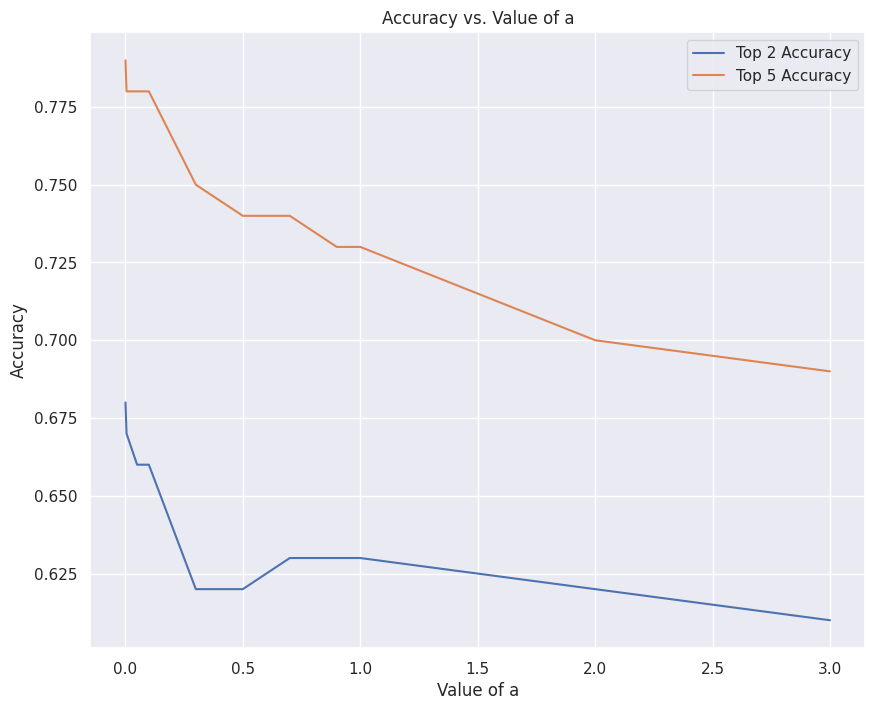

,a,top2,top5
0,0.0005,0.68,0.79
1,0.0050,0.67,0.78
2,0.0500,0.66,0.78
3,0.1000,0.66,0.78
4,0.3000,0.62,0.75
5,0.5000,0.62,0.74
6,0.7000,0.63,0.74
7,0.9000,0.63,0.73
8,1.0000,0.63,0.73
9,2.0000,0.62,0.70


In [39]:
# Create a pandas DataFrame from the result list
df = pd.DataFrame(result)

# Plot the data using seaborn
sns.lineplot(data=df, x='a', y='top2', label='Top 2 Accuracy')
sns.lineplot(data=df, x='a', y='top5', label='Top 5 Accuracy')

# Set plot labels and title
sns.set(style='darkgrid')
plt.xlabel('Value of a')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Value of a')

# Show the plot
plt.show()
df

## 4.3 Eval the different pretrained embeddings

In [40]:
def evaluate_dim_values(method=DownWeightGloveTextMatching, dim_list=None):
    if dim_list is None:
        dim_list = [50,100,200,300]
    result = []
    a = 1e-5
    for dim in dim_list:
        start_time = time.time()

        top2 = evaluate(method, query_set, query_id, candidate_set, top_k=2, a=a, dim=dim)
        top5 = evaluate(method, query_set, query_id, candidate_set, top_k=5, a=a, dim=dim)

        end_time = time.time()
        execution_time = end_time - start_time
        result.append({
            'dim': dim,
            'top2': top2,
            'top5': top5,
            'time': execution_time
        })
    return result

In [41]:
results = evaluate_dim_values(SIFGloveTextMatching)

Using a = 1e-05


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=2 0.57
Using a = 1e-05


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=5 0.65
Using a = 1e-05


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=2 0.64
Using a = 1e-05


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=5 0.72
Using a = 1e-05


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=2 0.64
Using a = 1e-05


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=5 0.72
Using a = 1e-05


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=2 0.68
Using a = 1e-05


Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=5 0.79


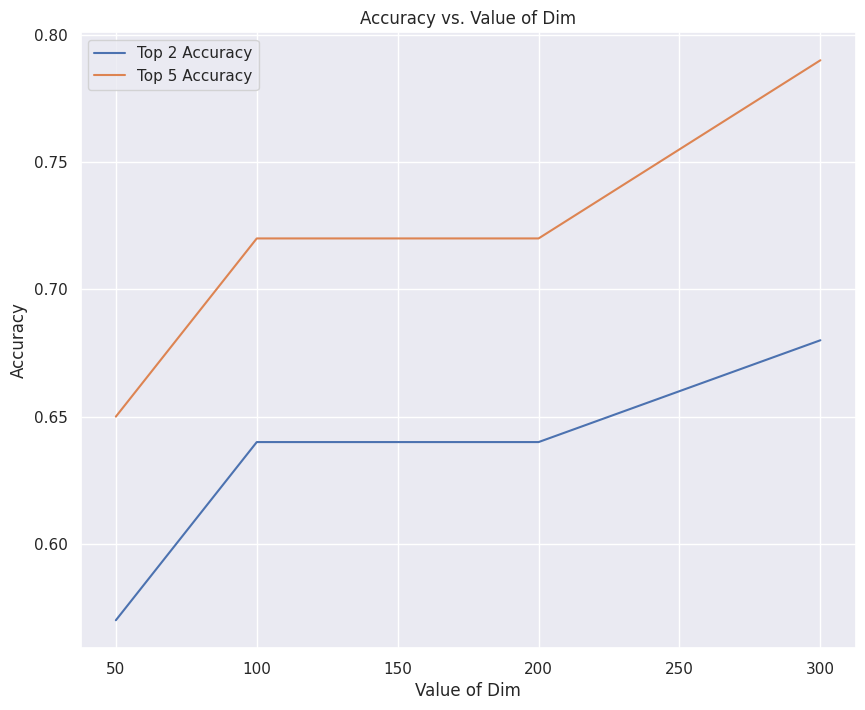

,dim,top2,top5,time
0,50,0.57,0.65,7.400067
1,100,0.64,0.72,10.579700
2,200,0.64,0.72,17.000329
3,300,0.68,0.79,23.862281


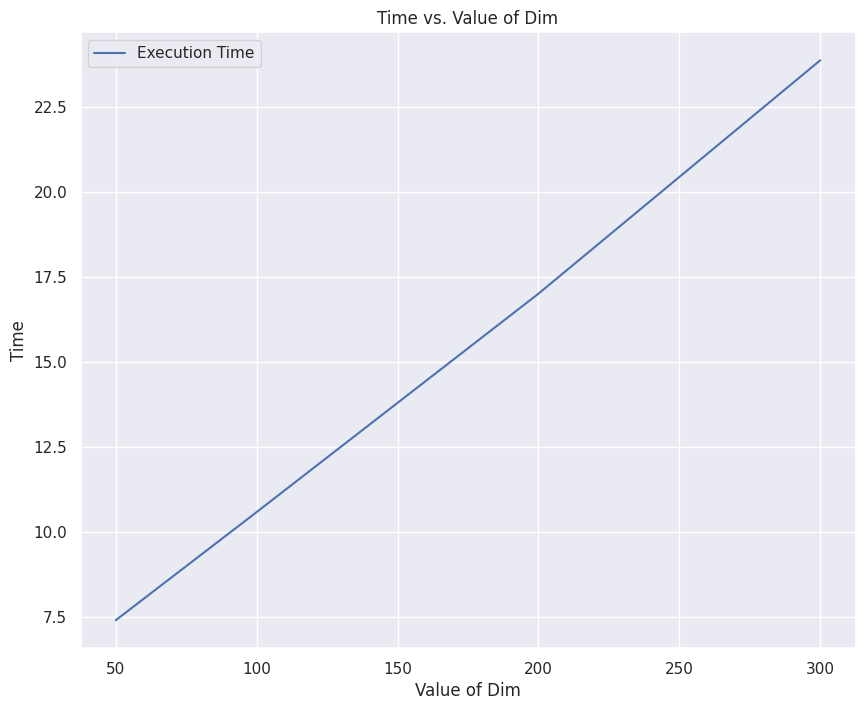

In [42]:
# Create a pandas DataFrame from the result list
df = pd.DataFrame(results)

# Plot the data using seaborn
sns.lineplot(data=df, x='dim', y='top2', label='Top 2 Accuracy')
sns.lineplot(data=df, x='dim', y='top5', label='Top 5 Accuracy')
# sns.lineplot(data=df, x='dim', y='time', label='Execution Time')

# Set plot labels and title
sns.set(style='darkgrid')
plt.xlabel('Value of Dim')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Value of Dim')

# Show the plot
plt.show()

sns.lineplot(data=df, x='dim', y='time', label='Execution Time')
sns.set(style='darkgrid')
plt.xlabel('Value of Dim')
plt.ylabel('Time')
plt.title('Time vs. Value of Dim')


df

## 4.4 Sentence-BERT Zero Shot

In [46]:

# Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0]  # First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

class SentenceBERTTextMatching(GloveTextMatching):
    def __init__(self):
        super().__init__()
        self.tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-mpnet-base-v2')
        self.model = AutoModel.from_pretrained('sentence-transformers/all-mpnet-base-v2')
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model.to(self.device)

    def calculate_sentence_embedding(self, sentence):
        # Tokenize sentences
        encoded_input = self.tokenizer(sentence, padding=True, truncation=True, max_length=128, return_tensors='pt')

        # Move data to CUDA device
        encoded_input = {key: value.to(self.device) for key, value in encoded_input.items()}

        # Compute token embeddings
        with torch.no_grad():
            model_output = self.model(**encoded_input)

        # Perform pooling. In this case, mean pooling
        sentence_embedding = mean_pooling(model_output, encoded_input['attention_mask'])
        sentence_embedding = sentence_embedding.cpu().numpy()[0]  # Move data to CPU and convert to NumPy array

        return sentence_embedding


In [16]:
sbert_text_matching = SentenceBERTTextMatching()
sbert_text_matching.build_index(candidate_set[0:10000])
print(query_set[10])
print(candidate_set[query_id[10]])
sbert_text_matching.search(query_set[10],top_k=5)

best books cosmology
best book cosmology


[('best book cosmology', 0.9842958, 27),
 ('best books learn astronomy beginners', 0.6051938, 3478),
 ('best science fiction novels', 0.5419012, 6747),
 ('best sources learn astronomy', 0.5202146, 3539),
 ('philosophical books would consider best or among best', 0.49265563, 3242)]

### eval SentenceBERTTextMatching top 2

In [45]:
evaluate(SentenceBERTTextMatching, query_set, query_id, candidate_set, top_k=2)

Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=2 0.78


0.78

### eval SentenceBERTTextMatching top 5

In [46]:
evaluate(SentenceBERTTextMatching, query_set, query_id, candidate_set, top_k=5)

Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=5 0.9


0.9

### Failure cases evaluation

In [47]:
def evaluate_failed(target_class, q_data, q_gt, train_data, top_k=1, **kwargs):
    matcher = target_class(**kwargs)
    matcher.build_index(train_data)
    correct = 0
    correct_list = []
    for i,( q, gt) in tqdm(enumerate(zip(q_data, q_gt)), desc="Evaluating"):
        results = matcher.search(q, top_k=top_k)
        for result in results:
            if result[2] == gt:
                correct += 1
                correct_list.append(i)
                break

    incorrect_list = list(set(range(len(q_data))) - set(correct_list))
    return incorrect_list

incorrect_list = evaluate_failed(SentenceBERTTextMatching, query_set, query_id, candidate_set, top_k=5)

Evaluating: 0it [00:00, ?it/s]

In [48]:
for i in incorrect_list:
    print(f'query {query_set[i]}')
    print(f'gt : {candidate_set[query_id[i]]}')
    print(f'pred : {sbert_text_matching.search(query_set[i],top_k=5)}')
    print('------------------')


query lose 4kg weight
gt : ways losing weight
pred : [('lose weight', 0.5224763, 124), ('jailbreak iphone 4', 0.48629242, 7623), ('lose weight 16 years old teenager', 0.4783409, 2259), ('best ways lose weight', 0.4659484, 2054), ('get 4 confirmed seats kolkata bhubaneswar urgently', 0.460153, 5327)]
------------------
query ways earning money online
gt : could make money online
pred : [('ways earning money online', 1.0000001, 929), ('best ways earn money online', 0.953984, 1404), ('various ways one earn money online', 0.93164515, 2364), ('best ways make money online', 0.9229556, 1574), ('easiest way earn money online', 0.9110748, 9066)]
------------------
query saltwater taffy candy imported japan
gt : saltwater taffy candy imported austria
pred : [('saltwater taffy candy imported japan', 1.0000002, 1131), ('saltwater taffy candy imported south korea', 0.87002736, 3459), ('saltwater taffy candy imported mexico', 0.8509986, 869), ('saltwater taffy candy imported philippines', 0.82222074

## 4.5 Sentence-BERT Fine Tune

In [18]:
import pandas as pd
from torch.utils.data import DataLoader
from sentence_transformers import InputExample

# Assuming df is your DataFrame
df = pd.read_csv('data.tsv', sep="\t", error_bad_lines=False)

# Case 1: Using "is_duplicate" as a similarity score
train_examples_case1 = [InputExample(texts=[row['question1'], row['question2']], label=row['is_duplicate']) for _, row in df.iterrows()]

# Case 2: Using "is_duplicate" to select positive pairs
train_examples_case2 = [InputExample(texts=[row['question1'], row['question2']]) for _, row in df[df['is_duplicate'] == 1].iterrows()]

# Convert to DataLoader
train_dataloader_case1 = DataLoader(train_examples_case1[10000:20000], shuffle=True, batch_size=16)
train_dataloader_case2 = DataLoader(train_examples_case2[10000:20000], shuffle=True, batch_size=16)


/tmp/ipykernel_1339937/1906701565.py:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('data.tsv', sep="\t", error_bad_lines=False)
Skipping line 83032: expected 6 fields, saw 7

Skipping line 154657: expected 6 fields, saw 7

Skipping line 323916: expected 6 fields, saw 7

/tmp/ipykernel_1339937/1906701565.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.tsv', sep="\t", error_bad_lines=False)


In [26]:
from sentence_transformers import SentenceTransformer

model_id = "sentence-transformers/all-mpnet-base-v2"
model = SentenceTransformer(model_id)

In [27]:
from sentence_transformers import losses

train_loss = losses.CosineSimilarityLoss(model=model)

In [28]:
model.fit(train_objectives=[(train_dataloader_case1, train_loss)], epochs=2)

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Iteration:   0%|          | 0/625 [00:00<?, ?it/s]

Iteration:   0%|          | 0/625 [00:00<?, ?it/s]

In [29]:
class SentenceBERTTextMatchingFT(GloveTextMatching):
    def __init__(self, model):
        super().__init__()
        self.model = model


    def calculate_sentence_embedding(self, sentence):
        # Tokenize sentences
        return self.model.encode(sentence)


In [30]:
sbert_text_matching = SentenceBERTTextMatchingFT(model)
sbert_text_matching.build_index(candidate_set[0:10000])
print(query_set[10])
print(candidate_set[query_id[10]])
sbert_text_matching.search(query_set[10],top_k=5)

best books cosmology
best book cosmology


[('best book cosmology', 0.9678912, 27),
 ('best books learn astronomy beginners', 0.587507, 3478),
 ('best science fiction novels', 0.4694779, 6747),
 ('best sources learn astronomy', 0.46824706, 3539),
 ('best book tensor calculus', 0.45076454, 13)]

In [31]:
evaluate(SentenceBERTTextMatchingFT, query_set, query_id, candidate_set, top_k=2, model=model)

Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=2 0.72


0.72

In [33]:
evaluate(SentenceBERTTextMatchingFT, query_set, query_id, candidate_set, top_k=5, model=model)

Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=5 0.8


0.8

Evaluating: 0it [00:00, ?it/s]

Accuracy: Top-K=5 0.8


0.8

## Save the Notebook

In [50]:
import glob

files = glob.glob('*.py')
# outputs = glob.glob('*.csv')
outputs = glob.glob('*.png')
outputs += glob.glob('*.PNG')
# outputs += glob.glob('*.txt')
# outputs = glob.glob('figures/*')
# outputs.append('download.sh')
import jovian

jovian.commit(project='akide/ANLP_assignment_2',
              filename='ANLP_A2.ipynb',
              files=files,
              new_project=False,
              outputs=outputs,
              environment='auto')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "akide/anlp-assignment-2" on https://jovian.com/
[jovian] Capturing environment..


/bin/sh: 1: conda: not found
/bin/sh: 1: conda: not found
[jovian] Error: Failed to read Anaconda environment using command: "conda env export -n base --no-builds"


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
[jovian] Uploading additiona

'https://jovian.com/akide/anlp-assignment-2'